In [1]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import math


In [3]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
def calculate_entropy(data, target_column):
    total_rows = len(data)
    target_values = data[target_column].unique()

    entropy = 0
    for value in target_values:
        # Calculate the proportion of instances with the current value
        value_count = len(data[data[target_column] == value])
        proportion = value_count / total_rows
        entropy -= proportion * math.log2(proportion)

    return entropy

entropy_outcome = calculate_entropy(df, 'Outcome')
print(f"Entropy of the dataset: {entropy_outcome}")

Entropy of the dataset: 0.9331343166407831


In [7]:
def calculate_entropy(data, target_column): # for each categorical variable
    total_rows = len(data)
    target_values = data[target_column].unique()

    entropy = 0
    for value in target_values:
        # Calculate the proportion of instances with the current value
        value_count = len(data[data[target_column] == value])
        proportion = value_count / total_rows
        entropy -= proportion * math.log2(proportion) if proportion != 0 else 0

    return entropy

def calculate_information_gain(data, feature, target_column):

    # Calculate weighted average entropy for the feature
    unique_values = data[feature].unique()
    weighted_entropy = 0

    for value in unique_values:
        subset = data[data[feature] == value]
        proportion = len(subset) / len(data)
        weighted_entropy += proportion * calculate_entropy(subset, target_column)

    # Calculate information gain
    information_gain = entropy_outcome - weighted_entropy

    return information_gain

In [8]:
for column in df.columns[:-1]:
    entropy = calculate_entropy(df, column)
    information_gain = calculate_information_gain(df, column, 'Outcome')
    print(f"{column} - Entropy: {entropy:.3f}, Information Gain: {information_gain:.3f}")

Pregnancies - Entropy: 3.482, Information Gain: 0.062
Glucose - Entropy: 6.751, Information Gain: 0.304
BloodPressure - Entropy: 4.792, Information Gain: 0.059
SkinThickness - Entropy: 4.586, Information Gain: 0.082
Insulin - Entropy: 4.682, Information Gain: 0.277
BMI - Entropy: 7.594, Information Gain: 0.344
DiabetesPedigreeFunction - Entropy: 8.829, Information Gain: 0.651
Age - Entropy: 5.029, Information Gain: 0.141


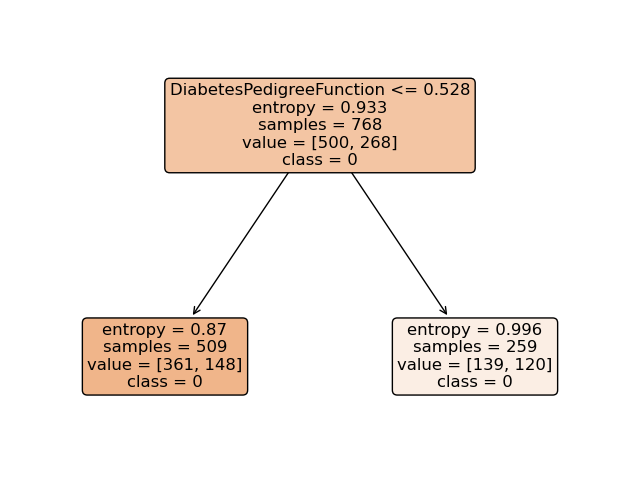

In [9]:
# Feature selection for the first step in making decision tree
selected_feature = 'DiabetesPedigreeFunction'

# Create a decision tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
X = df[[selected_feature]]
y = df['Outcome']
clf.fit(X, y)

plt.figure(figsize=(8, 6))
plot_tree(clf, feature_names=[selected_feature], class_names=['0', '1'], filled=True, rounded=True)
plt.show()

In [12]:
def id3(data, target_column, features):
    if len(data[target_column].unique()) == 1:
        return data[target_column].iloc[0]


    if len(features) == 0:
        return data[target_column].mode().iloc[0]

    best_feature = max(features, key=lambda x: calculate_information_gain(data, x, target_column))

    tree = {best_feature: {}}

    features = [f for f in features if f != best_feature]

    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value]
        tree[best_feature][value] = id3(subset, target_column, features)

    return tree
id3(df, 'Outcome', ['Pregnancies',  'Glucose',  'BloodPressure',  'SkinThickness',  'Insulin',  'BMI',  'DiabetesPedigreeFunction', 'Age'] )

{'DiabetesPedigreeFunction': {0.627: 1,
  0.351: 0,
  0.672: 1,
  0.167: 0,
  2.288: 1,
  0.201: 0,
  0.248: {'Pregnancies': {3: 1, 1: 0}},
  0.134: 0,
  0.158: {'Glucose': {197: 1, 108: 0}},
  0.232: 1,
  0.191: 0,
  0.537: 1,
  1.441: 0,
  0.398: 1,
  0.587: {'Glucose': {166: 1, 44: 0, 91: 0}},
  0.484: 1,
  0.551: {'Pregnancies': {0: 1, 3: 0, 8: 0, 1: 0}},
  0.254: {'Glucose': {107: 1, 143: 1, 187: 1, 122: 0, 161: 0, 124: 1}},
  0.183: {'Pregnancies': {1: 0, 8: 1}},
  0.529: 1,
  0.704: 0,
  0.388: 0,
  0.451: 1,
  0.263: {'Pregnancies': {9: 1, 5: 0, 10: 0, 0: 0}},
  0.205: {'Pregnancies': {10: 1, 1: 0, 0: 1}},
  0.257: {'Pregnancies': {7: 1, 2: 0, 13: 1}},
  0.487: 0,
  0.245: {'Pregnancies': {13: 0, 10: 0, 6: 1, 5: 0}},
  0.337: {'Pregnancies': {5: 0, 7: 1, 2: 1}},
  0.546: 0,
  0.851: 1,
  0.267: 0,
  0.188: 0,
  0.512: 0,
  0.966: 0,
  0.42: 0,
  0.665: 1,
  0.503: 1,
  1.39: 1,
  0.271: 0,
  0.696: 0,
  0.235: {'Pregnancies': {7: 0, 2: 0, 4: 1}},
  0.721: 1,
  0.294: 0,
  1.893